# Test Script - Dario Loi, Flavio Gezzi


Questo file .ipynb permette di eseguire il nostro metodo Exposure Fusion.

Nel notebook ci preoccuperemo di:

* Caricare i diversi "Dataset" di input
* Inizializzare la nostra classe Exposure Fusion
* Processare i diversi dataset
* Mostrare i risultati (tramite matplotlib)

In [86]:
import cv2 
import os

In [87]:
def get_files(path):
    files = []
    for r, d, f in os.walk(path):
        for file in f:
            if '.png' in file or ".jpg" in file or ".jpeg" in file:
                files.append(os.path.join(r, file))

    return files

# otteniamo i filename dei vari dataset

cwd = os.getcwd()

crusader = get_files(os.path.join(cwd, "images", "crusader"))
crusader_flash = get_files(os.path.join(cwd, "images", "crusader_flash"))
statues_one = get_files(os.path.join(cwd, "images", "statues", "one"))
statues_two = get_files(os.path.join(cwd, "images", "statues", "two"))


In [88]:
# Carichiamo le immagini

crusader_img = [cv2.imread(file) for file in crusader]
crusader_flash_img = [cv2.imread(file) for file in crusader_flash]
statues_one_img = [cv2.imread(file) for file in statues_one]
statues_two_img = [cv2.imread(file) for file in statues_two]


In [89]:
# Definiamo una funzione di matplot per visualizzare le immagini

import matplotlib.pyplot as plt
import numpy as np

def plot_images(images, title="", rows = 1, interpolation="bilinear", showing_hdr=False):
    n_images = len(images)
    if n_images == 0:
        print("No images to display")
        return
    
    # create rows x N matrix of subplots
    
    cols = int(np.ceil(n_images/float(rows)))
    
    fig, axs = plt.subplots(figsize=(16, 16), nrows=rows, ncols=cols)
    
    fig.suptitle(title)
    for i, image in enumerate(images):
        
        if rows == 1:
            ax = axs[i]
        else:
            ax = axs[i//cols, i%cols]
            
        image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)
        image = image[:, :, ::-1]
        
        ax.imshow(image, interpolation=interpolation)
        ax.axis("off")
        
        if showing_hdr and i == 0:
            ax.set_title("HDR")
        else:
            ax.set_title(f"Image {i+1}")
        
    
    fig.tight_layout()
    plt.show()


## Mostriamo i Dataset

Di seguito varie chiamate a matplotlib per visualizzare i dati, le chiamate sono 
molto lente e conviene saltarle se si vuole eseguire il notebook in maniera veloce.

Alcuni plot sono lasciati vuoti per comoditá.

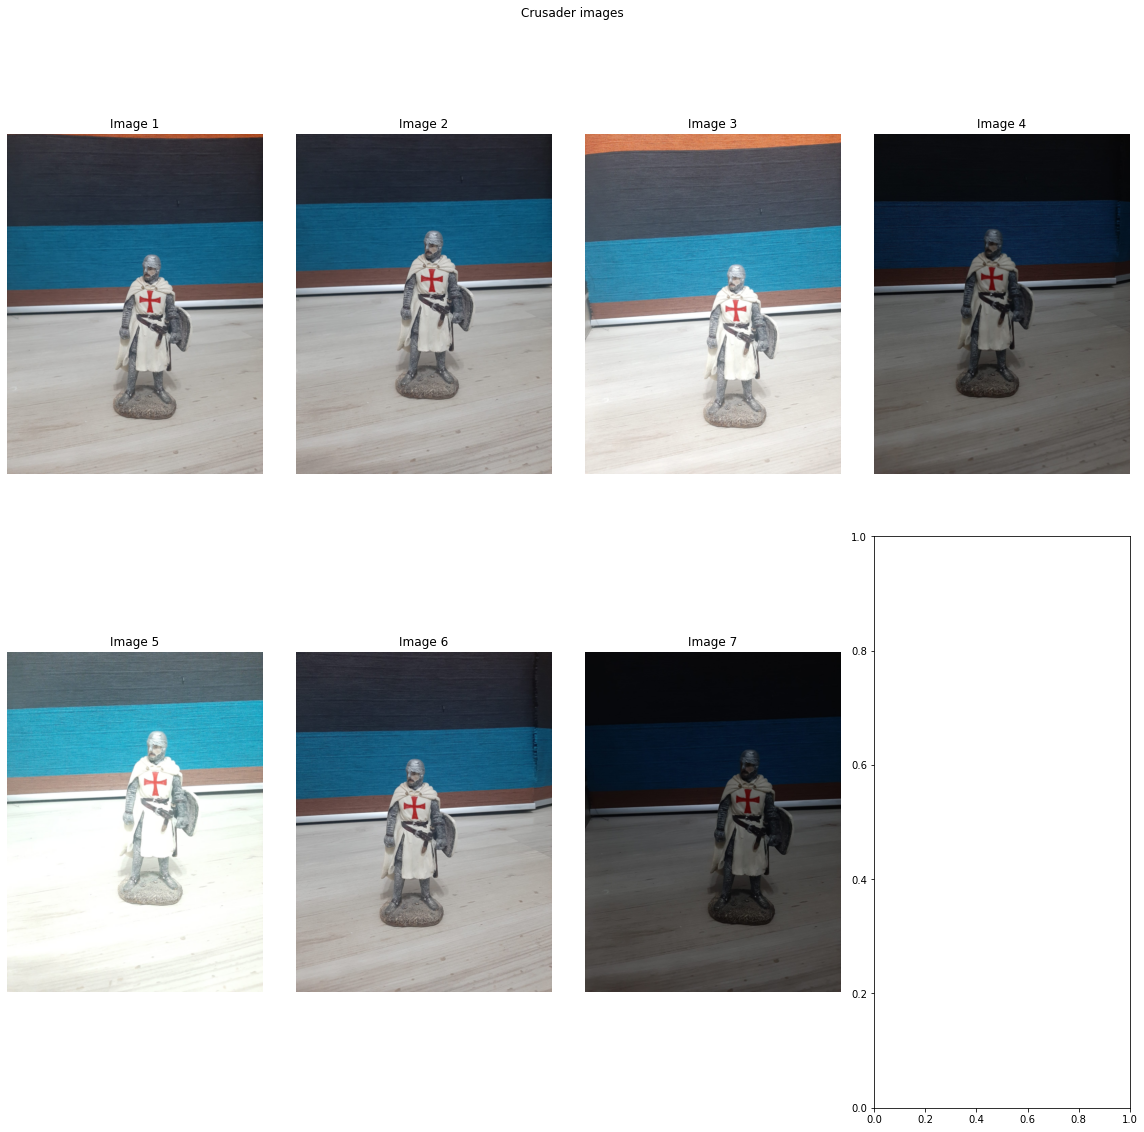

In [90]:
plot_images(crusader_img, title="Crusader images", rows=2)

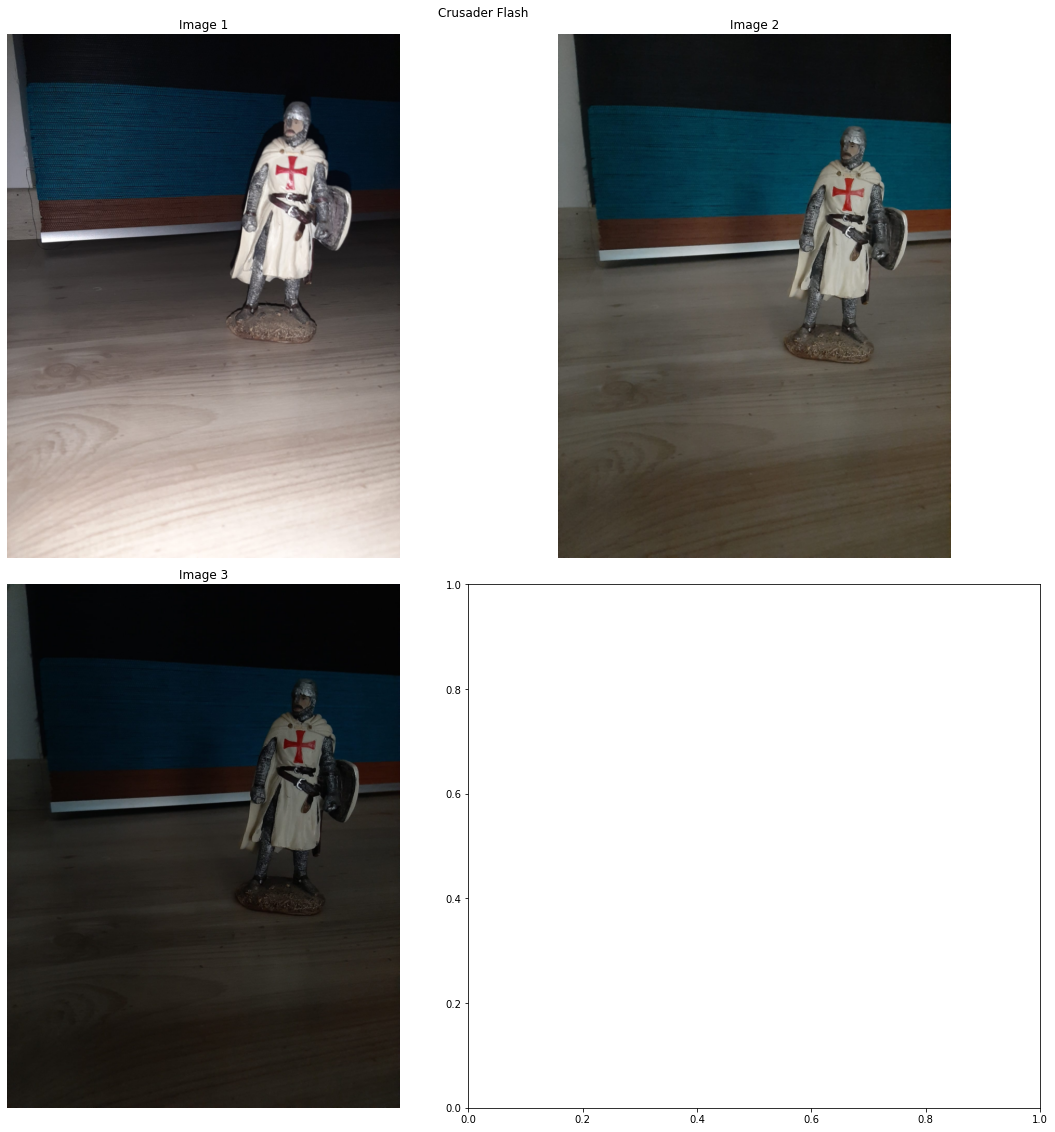

In [91]:
plot_images(crusader_flash_img, "Crusader Flash", 2)

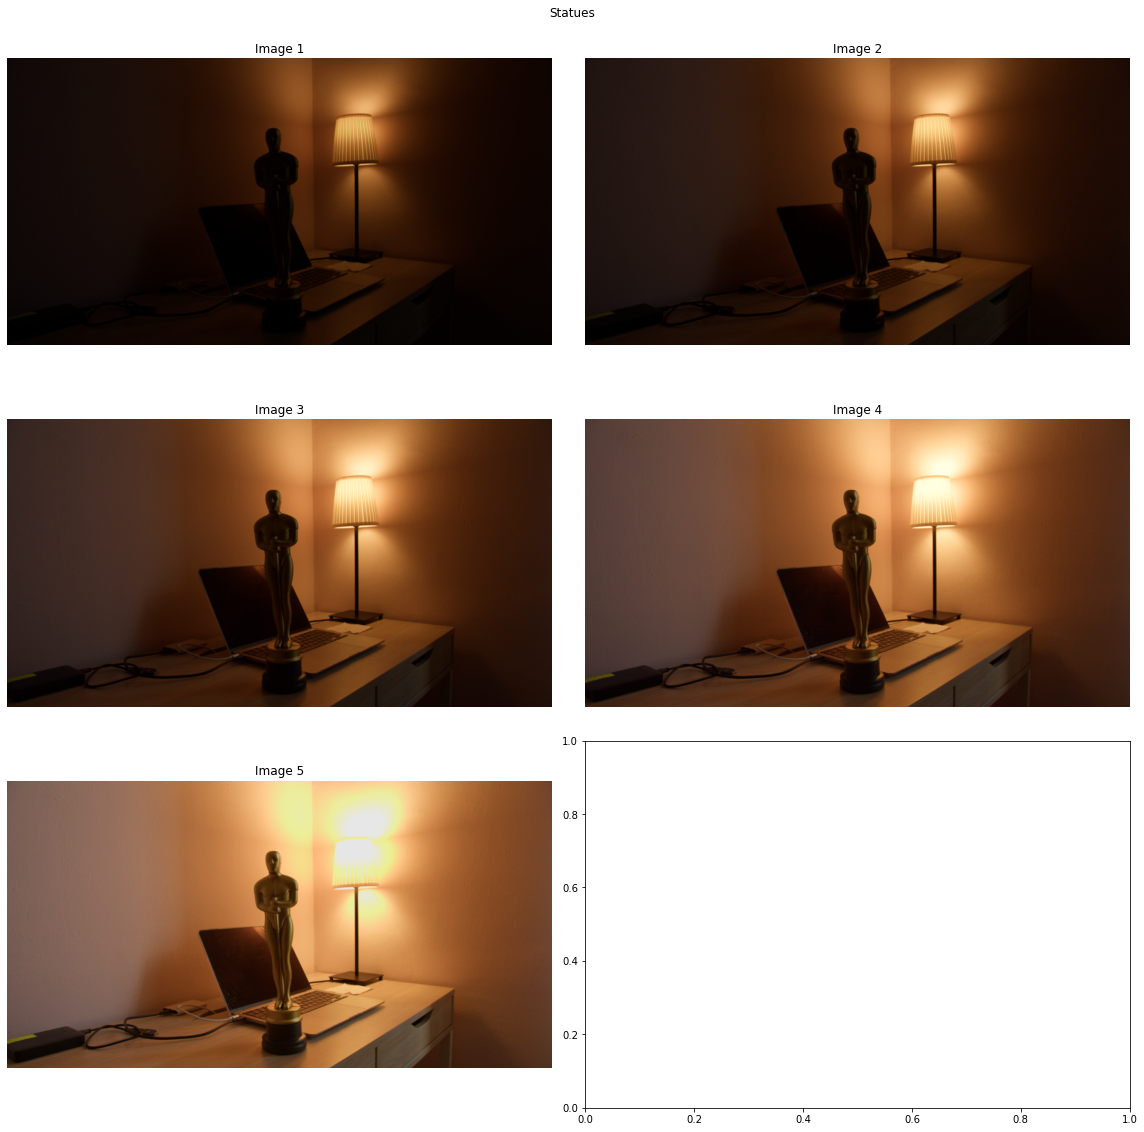

In [92]:
plot_images(statues_one_img, "Statues", 3)

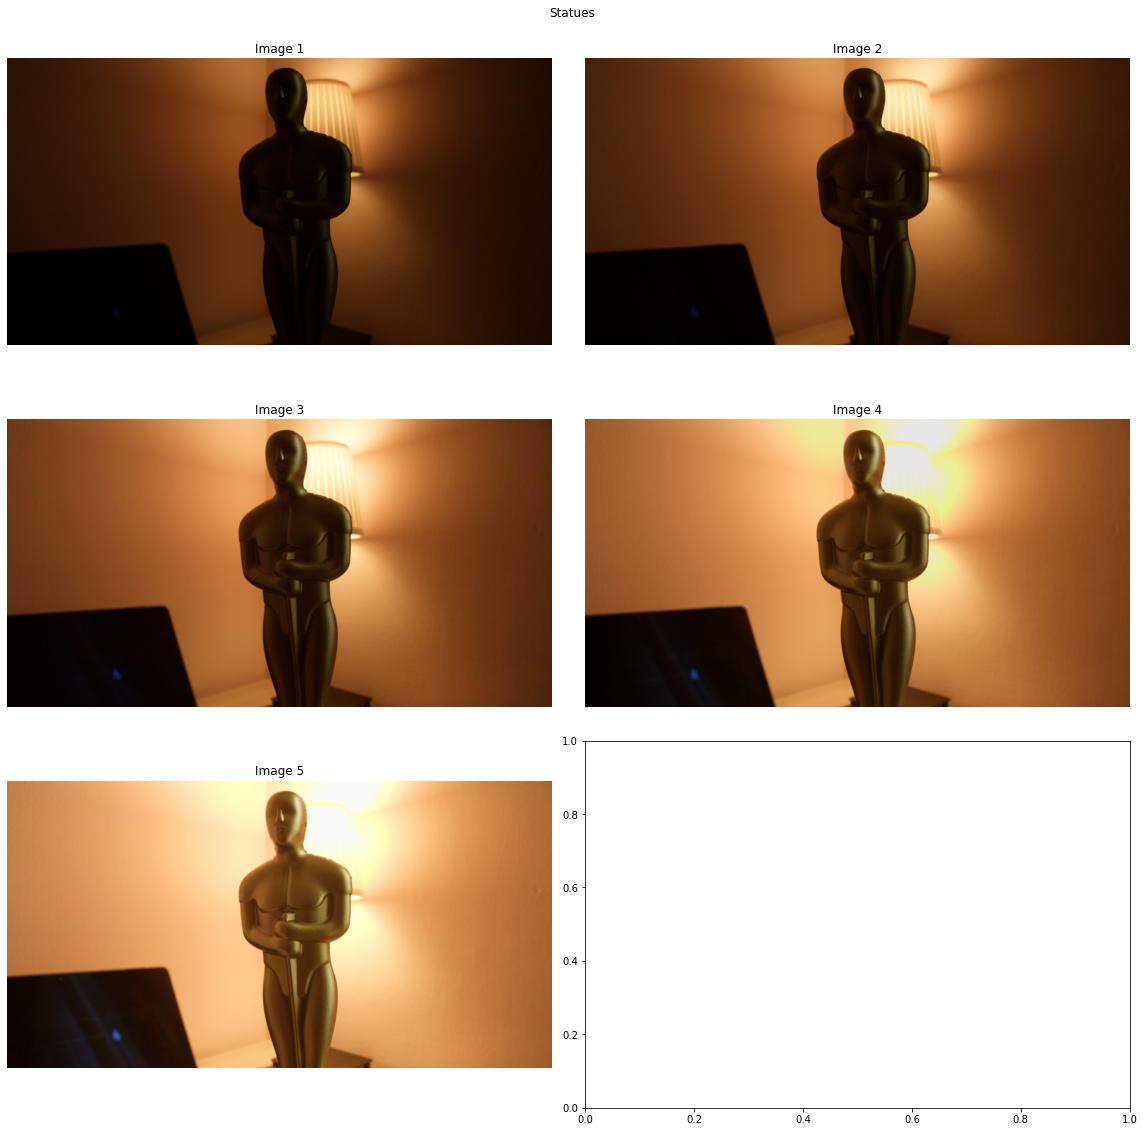

In [93]:
plot_images(statues_two_img, "Statues", 3)

## Exposure Fusion

In [94]:
from exposure_fusion import ExposureFusion

In [95]:
# Parametri che offrono un buon risultato
fuser = ExposureFusion(perform_alignment=True, pyramid_levels=3, sigma=0.2)

In [96]:
HDR_crusader = fuser(crusader_img)
HDR_crusader_flash = fuser(crusader_flash_img)
HDR_statues_one = fuser(statues_one_img)
HDR_statues_two = fuser(statues_two_img)

05-Jan-23 17:06:36 - INFO - Input images are valid, proceeding with Exposure Fusion
05-Jan-23 17:06:36 - INFO - Processing 7 images, with shape (2016, 1512, 3)
05-Jan-23 17:06:36 - INFO - Performing image alignment
05-Jan-23 17:06:37 - INFO - Calculating weights
05-Jan-23 17:06:40 - INFO - Creating image pyramids
05-Jan-23 17:06:40 - INFO - Blending pyramids into final Laplacian
05-Jan-23 17:06:40 - INFO - Reconstructing final HDR image
05-Jan-23 17:06:40 - INFO - Input images are valid, proceeding with Exposure Fusion
05-Jan-23 17:06:40 - INFO - Processing 3 images, with shape (2016, 1512, 3)
05-Jan-23 17:06:40 - INFO - Performing image alignment
05-Jan-23 17:06:41 - INFO - Calculating weights
05-Jan-23 17:06:42 - INFO - Creating image pyramids
05-Jan-23 17:06:42 - INFO - Blending pyramids into final Laplacian
05-Jan-23 17:06:42 - INFO - Reconstructing final HDR image
05-Jan-23 17:06:42 - INFO - Input images are valid, proceeding with Exposure Fusion
05-Jan-23 17:06:42 - INFO - Proces

Notare dai log come il metodo Exposure Fusion é capace di processare quattro gruppi di immagini 
2K/4K in meno di un minuto, nella maggior parte dei casi in meno di 15 secondi ciascuno.

# Visione dei risultati

In [97]:
# Aggiungiamo l'immagine HDR alle liste LDR

crusader_img.insert(0, HDR_crusader)
crusader_flash_img.insert(0, HDR_crusader_flash)
statues_one_img.insert(0, HDR_statues_one)
statues_two_img.insert(0, HDR_statues_two)

Per primi, i due dataset `statues`, immagini di alta qualitá scattate con reflex.

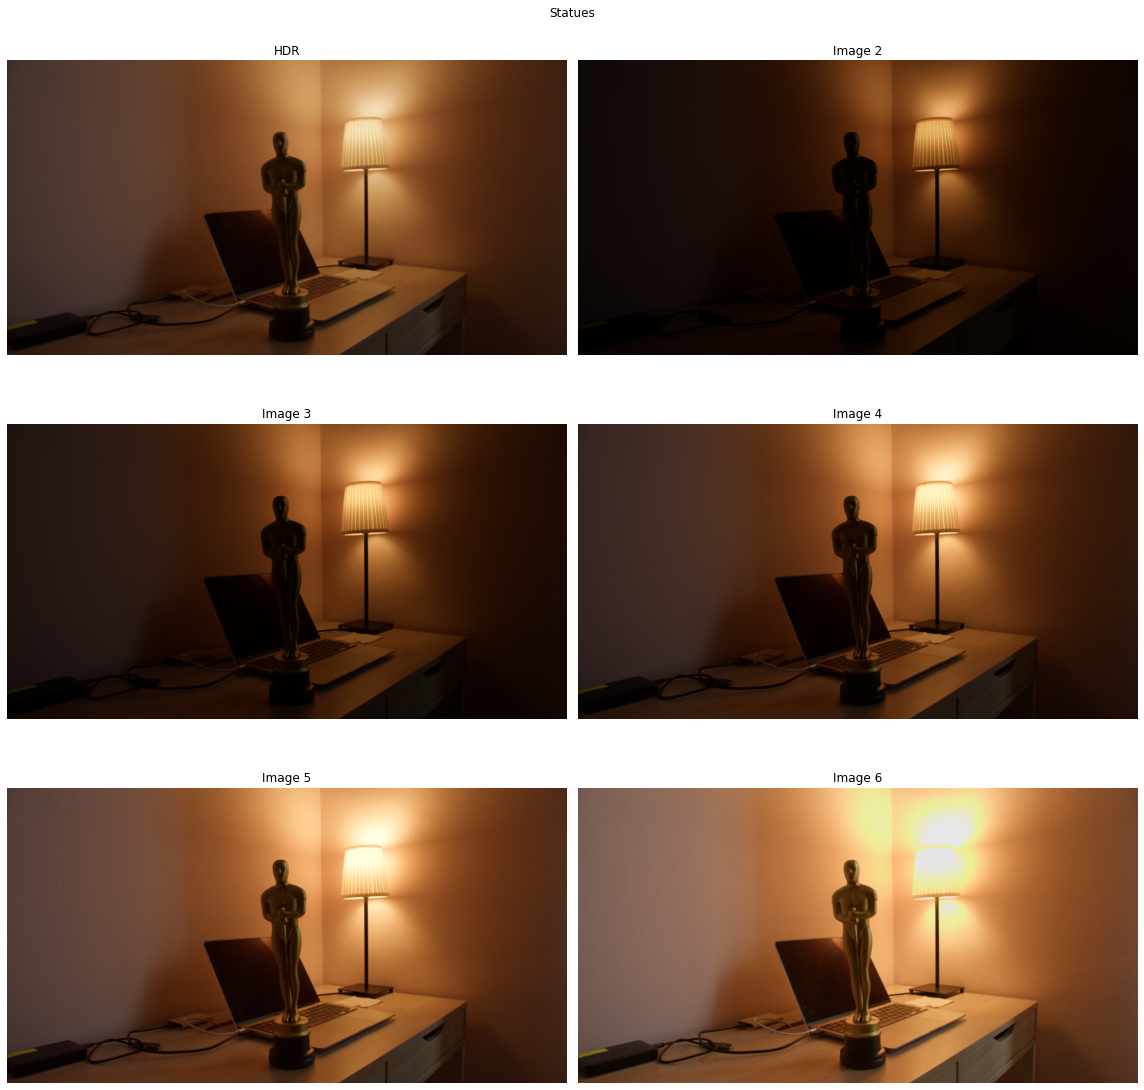

In [98]:
plot_images(statues_one_img, "Statues", 3, showing_hdr=True)


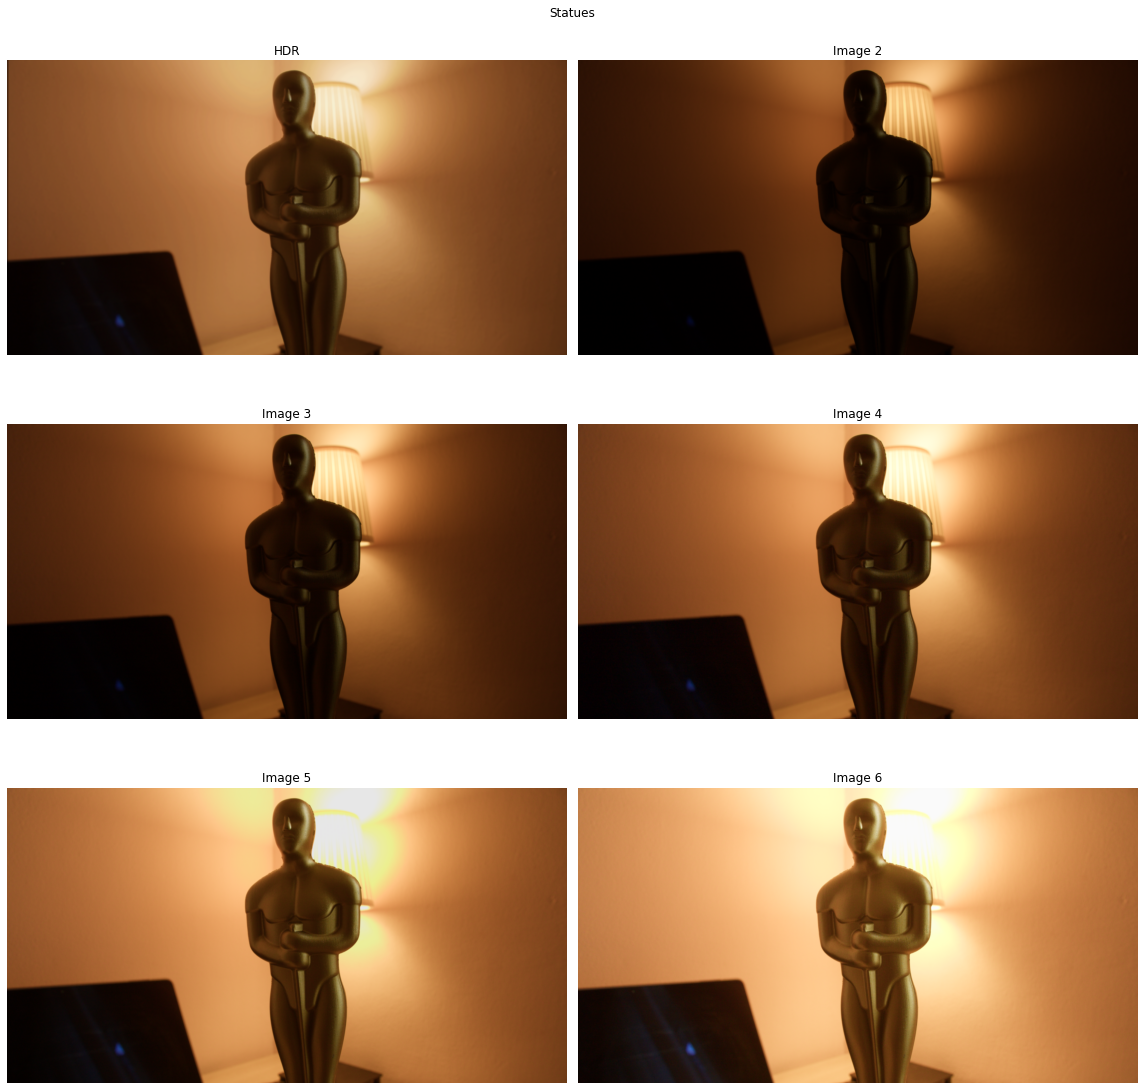

In [99]:
plot_images(statues_two_img, "Statues", 3, showing_hdr=True)

In seguito le immagini dei set `crusader` e `crusader_flash`, che soffrono di un forte disallineamento, possiamo notare gli artefatti di deformazione nell'output HDR.

Per visualizzare i risultati del metodo tradizionale, inizializzare il funtore ExposureFusion con il parametro `perform_alignment=False`.

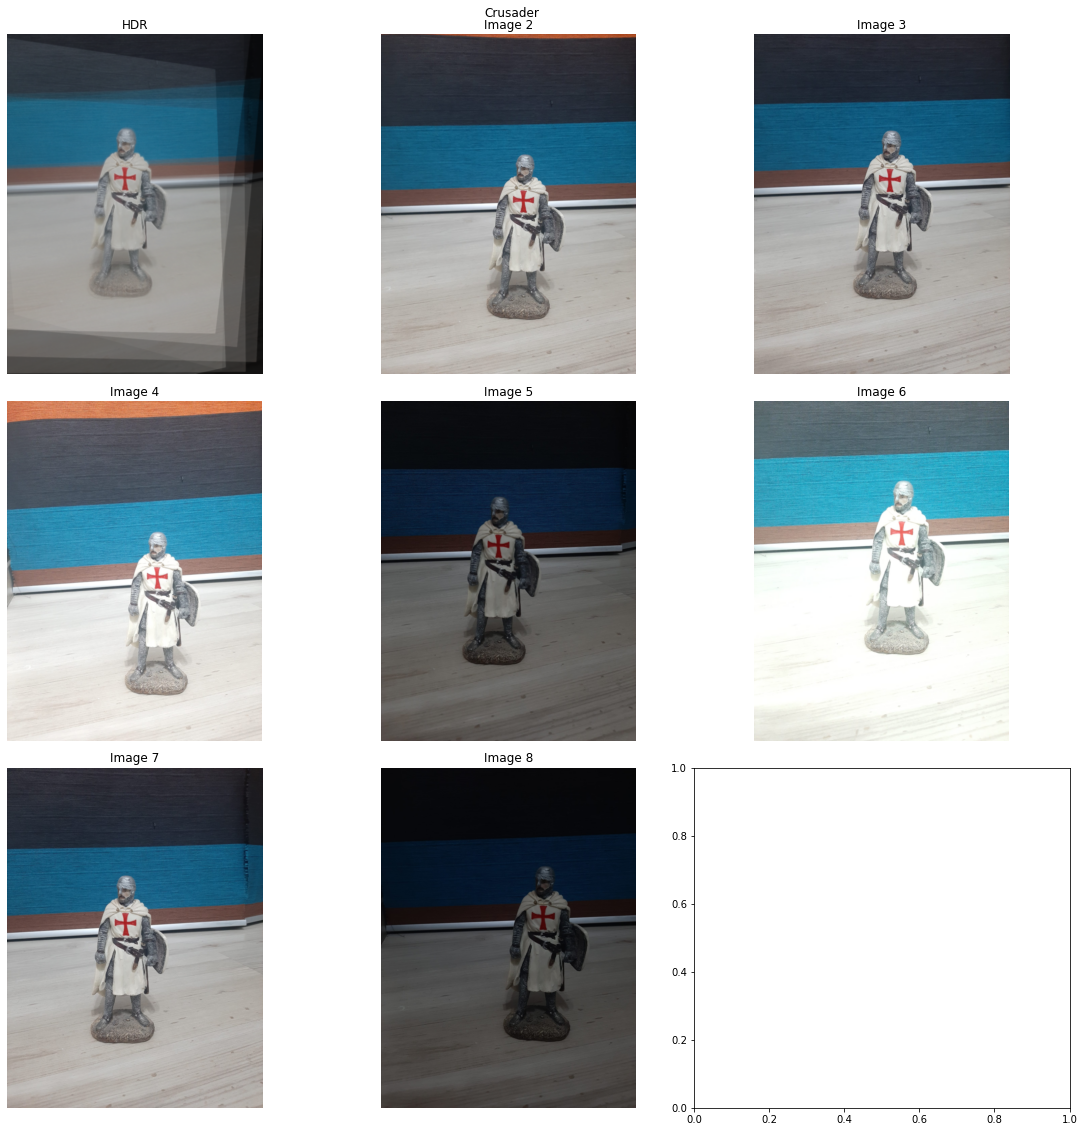

In [100]:
plot_images(crusader_img, "Crusader", 3, showing_hdr=True)

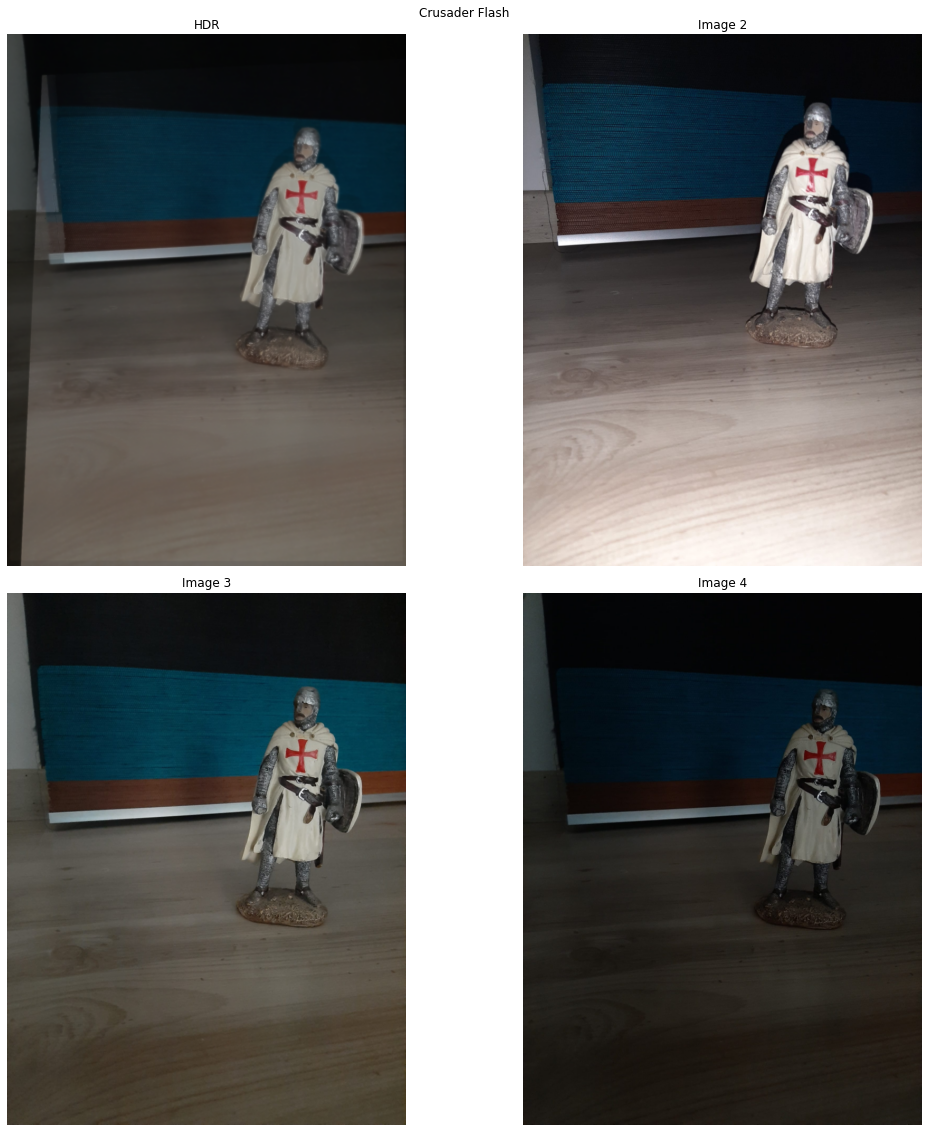

In [101]:
plot_images(crusader_flash_img, "Crusader Flash", 2, showing_hdr=True)